<a href="https://colab.research.google.com/github/james-monahan/Code-school-notebooks/blob/main/Week-5-python-sql/Monty_Hall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Monty Hall

**Below is an example of an implementation of the Monty Hall game using Python. It contains no comments.**

## Mission 1

After reviewing the code below, add both **unilinear** and **multilinear** comments to explain how it works to another developer.

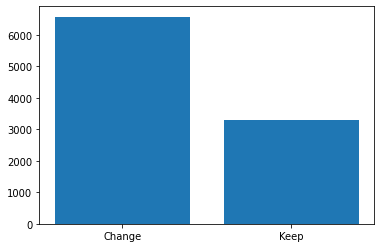

In [ ]:
import matplotlib.pyplot as plt

from random import randint


#player choices
CHANGE = "change"
KEEP = "keep"

def playOneGame (strategy):
    # available choices
    doors = [0, 1, 2]

    # randomly choose door with prize
    good_door = randint(0,2)

    # players first random choice
    first_choice = randint(0,2)

    # remove player door, will be one of two choices in next part)
    doors.remove(first_choice)

    # if door was correct, eliminate one of the two remaining doors (leaving first-choice and doors(1 val))
    # if door not good, it will update doors to only include good door, and first_choice still available
    if first_choice == good_door:
        doors.remove(doors [randint(0,1)])
    else:
        doors = [good_door]

    second_choice = 0

    #keep or switch strategy
    #if changing doors, it will select remaining value in doors, else first_choice will be maintained as player selection
    if strategy.lower() == "change":
        second_choice = doors[0]
    elif strategy.lower() == "keep":
        second_choice = first_choice
    else:
        raise ValueError("Strategy not recognized!")
    
    # return True if second choice matches the original good door
    return second_choice == good_door


def playManyGames(strategy, nb_turns):
    #looping over the number of turns
    #converting True to 1; false to 0 based on if player chose correctly
    return [1 if playOneGame(strategy) else 0 for i in range(nb_turns)]

#plotting results of the two strategies over 10000 iterations 
plot = plt.bar([1,2], [sum(playManyGames("change", 10000)), sum(playManyGames("keep", 10000))], 
               tick_label=["Change", "Keep"])

# Mission 2

To make sure you understood the code, in a new cell, change up the code in mission 1 to add a third bar. Go ahead and name this **"Alternating "**. This will be represent players that alternate **randomly** between "change" and "keep".


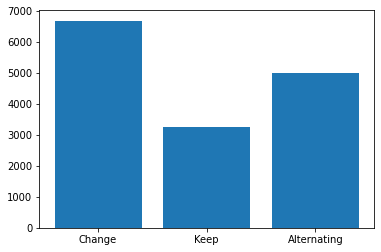

In [ ]:
import matplotlib.pyplot as plt

from random import randint, choice


#player choices
CHANGE = "change"
KEEP = "keep"
ALTERNATING = "alternating"

def playOneGame (strategy):
    # available choices
    doors = [0, 1, 2]

    # randomly choose door with prize
    good_door = randint(0,2)

    # players first random choice
    first_choice = randint(0,2)

    # remove player door, will be one of two choices in next part)
    doors.remove(first_choice)

    # if door was correct, eliminate one of the two remaining doors (leaving first-choice and doors(1 val))
    # if door not good, it will update doors to only include good door, and first_choice still available
    if first_choice == good_door:
        doors.remove(doors [randint(0,1)])
    else:
        doors = [good_door]

    second_choice = 0


    #add alternating strategy
    if strategy.lower() == "alternating":
      strategy = choice(["keep", "change"])
    
    #keep, switch or alternating strategy
    #if changing doors, it will select remaining value in doors, else first_choice will be maintained as player selection
    if strategy.lower() == "change":
        second_choice = doors[0]
    elif strategy.lower() == "keep":
        second_choice = first_choice
    else:
        raise ValueError("Strategy not recognized!")
    
    # return True if second choice matches the original good door
    return second_choice == good_door


def playManyGames(strategy, nb_turns):
    #looping over the number of turns
    #converting True to 1; false to 0 based on if player chose correctly
    return [1 if playOneGame(strategy) else 0 for i in range(nb_turns)]

#plotting results of the two strategies over 10000 iterations 
plot = plt.bar([1,2,3], [sum(playManyGames("change", 10000)), sum(playManyGames("keep", 10000)), sum(playManyGames("alternating", 10000))], 
               tick_label=["Change", "Keep", "Alternating"])

# Mission 3

Now, go ahead and re-code the Monty Hall game using Numpy. **Do not use Python lists, the random method in Python, or any for or while loops in the code**. Numpy contains all the mechanisms you need to achieve the same result.

Finally, combine the 2 functions, playOneGame() and playMultipleGames() into one. In other words, **your Numpy program should now contain only one function**. Obviously, **the visual should be the same as mission 2**.

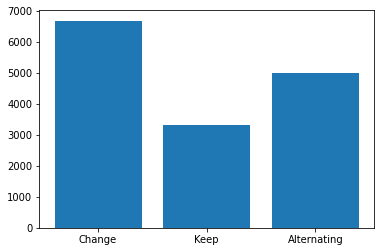

In [ ]:
import numpy as np
def numpy_solution(r):
  import matplotlib.pyplot as plt
  repeats = 10000
  good_door = np.random.randint(0,3, size=(repeats,1))
  player_choice = np.random.randint(0,3, size=(repeats,1))
  # if you pick correctly the first time, odds were 1/3, Montys choice is irrelevant
  stay = sum(good_door == player_choice)
  # if you switch you will win if you DID NOT guess correctly the first time, which is 2/3 odds
  #since Monty eliminates a non-wining option, if you guessed incorrectly, the winning option is switching
  switch = sum(good_door != player_choice)
  #alternating will just be the mean of these two events


  plot = plt.bar([1,2,3], [switch[0], stay[0], (switch[0]+stay[0])/2], 
               tick_label=["Change", "Keep", "Alternating"])
numpy_solution()